In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [6]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [7]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    test_indice = k_indices[k]
    test_x = x[test_indice]
    test_y = y[test_indice]
    train_x = np.delete(x, test_indice)
    train_y = np.delete(y, test_indice)

    poly_train = build_poly(train_x, degree)
    poly_test = build_poly(test_x, degree)
    
    w, rmse_train = ridge_regression(train_y, poly_train, lambda_)
    
    loss_tr = compute_mse(train_y, poly_train, w)
    loss_te = compute_mse(test_y, poly_test, w)
    
    return loss_tr, loss_te

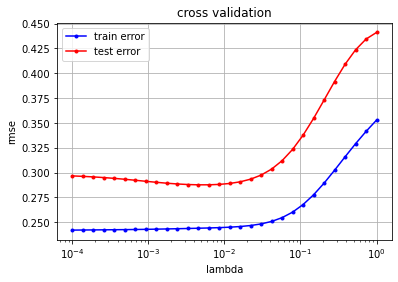

In [8]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for lambda_ in lambdas :
        rmse_train = 0
        rmse_test = 0
        for k in range(k_fold) :
            mse_tr, mse_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_train += np.sqrt(2 * mse_tr)
            rmse_test += np.sqrt(2 * mse_te)
        rmse_tr.append(rmse_train / k_fold)
        rmse_te.append(rmse_test / k_fold)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

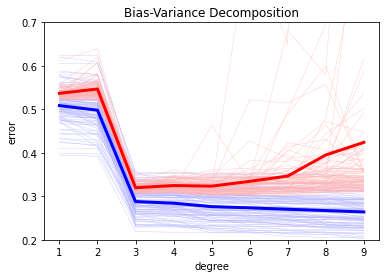

In [13]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        
        for degree in degrees :
            poly_train = build_poly(x_train, degree)
            poly_test = build_poly(x_test, degree)
            w, mse_train = least_squares(y_train, poly_train)
            e_test = y_test - poly_test.dot(w)
            mse_test = np.transpose(e_test).dot(e_test) / (2 * y_test.shape[0])
            rmse_tr[index_seed][degree - 1] = np.sqrt(2 * mse_train)
            rmse_te[index_seed][degree - 1] = np.sqrt(2 * mse_test)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()